In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


file = 'toeic_preprocessed_data.csv'
## 코드 입력
base_data = pd.read_csv(file)
display(base_data.head(10))

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7,알고 있음,10,181,173,354,227,213,440,241
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4,알고 있음,14,330,290,620,354,339,693,55
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4,알고 있음,4,367,309,676,396,365,761,37
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9,알고 있음,8,470,285,755,495,341,836,56
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6,알고 있음,4,273,372,645,314,426,740,95
5,6,F,1997,445,352,797,취업,온라인강의,영상 교재,주5-6회,9,알고 있음,7,360,256,616,372,269,641,156
6,7,F,1990,495,382,877,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주1-2회,4,알고 있음,4,487,337,824,495,341,836,41
7,8,M,1973,145,135,280,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,7,알고 있지 않음,7,132,129,261,133,130,263,17
8,9,M,1994,354,457,811,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,8,알고 있음,10,256,369,625,322,425,747,64
9,10,F,1984,423,346,769,승진,온라인강의,영상 교재,주5-6회,8,알고 있음,8,358,279,637,382,305,687,82


# 분석 - 1

# 영어 교육 사업을 한다면?

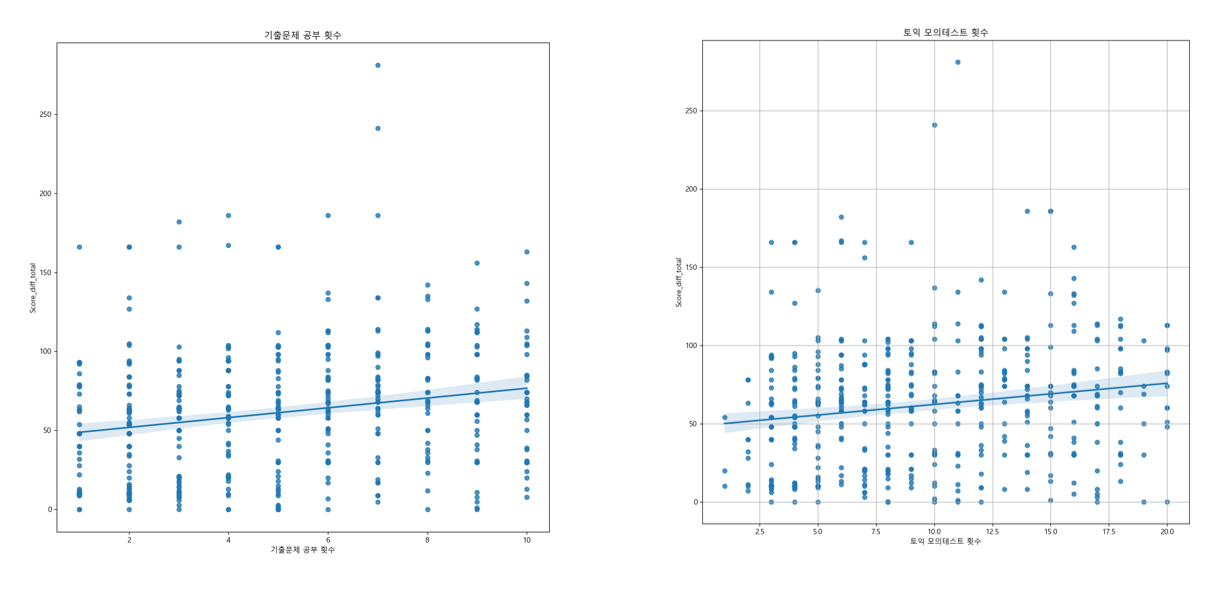

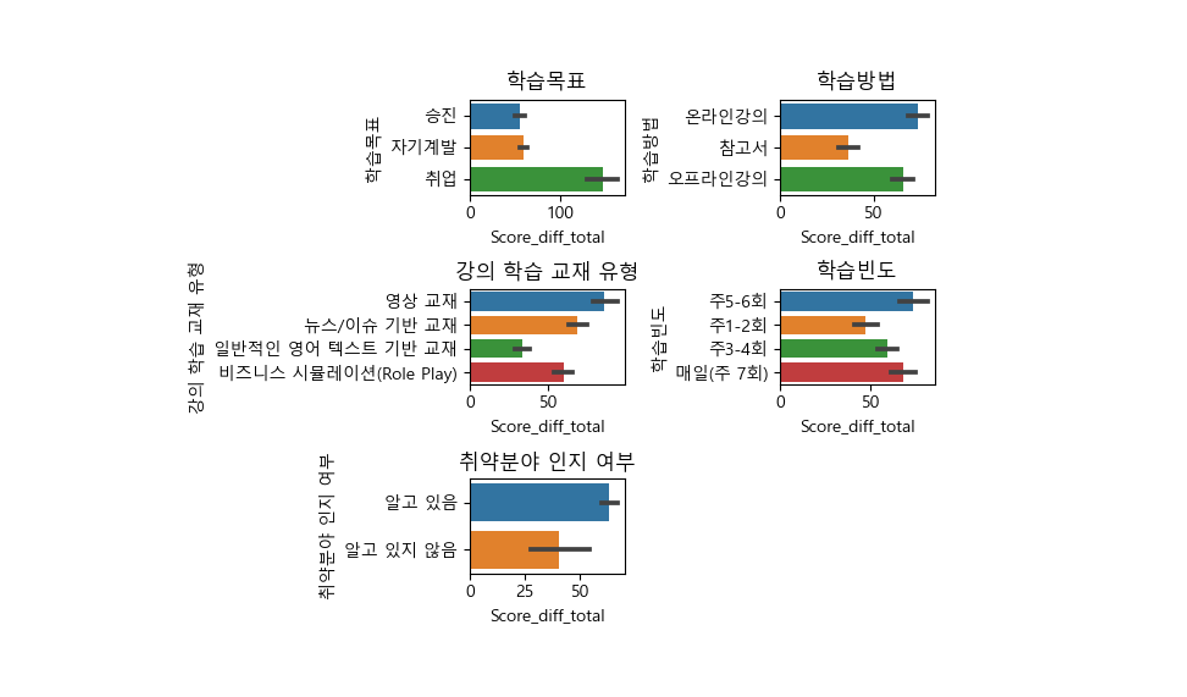

- 토익 점수와 가장 상관관계가 있는 것은 "기출문제 공부 횟수","토익 모의테스트 횟수"
- 취업을 목표로 공부하는 학생들의 점수 상승이 크다.
- 강의 학습 교재로는 <영상 교재> 학습 방법으로는 <온라인 강의>가 점수 상승에 큰 영향
- 영어 교육 관련 사업을 한다면 이점을 고려하여 전략을 수립해야 할 것이다.

# 이변량 분석 수치형 vs 수치형

- Pearson 상관분석
    
    - 귀무가설 : 상관계수는 0이다(=상관관계가 없다.)
    
    - p-value가 0.05 이상이면 귀무가설 채택(=상관관계가 없다.)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

file = 'toeic_preprocessed_data.csv'
base_data = pd.read_csv(file)

# 필요없는 'ID'는 삭제
base_data.drop(columns='ID', inplace=True)

keys = []
spst_list=[]
spst_dict = {}


# 숫자형인 컬럼을 key 값으로 사용하기 위해 미리 준비
for i in base_data.columns:
    if ( base_data[i].dtypes=='int64'):
#         print(i, base_data[i].dtypes)
        keys.append(i)
# print(keys)
        
# 피어슨 상관분석 p-value 값을 value로 사용하기 위해 준비
for i in keys:
    spst_list.append(list(spst.pearsonr(base_data[i], base_data['Score_diff_total'] ))[1])
# print(spst_list)
# print('='*100, '\n상관계수 p-value 출력', sep='')
spst_dict = dict(zip(keys, spst_list))
# display(spst_dict)


# 딕셔너리 형태로 만들어 p-value 값을 아래로 오름차순으로 출력
# lambda 매개변수 : 표현식
# items를 통해 키-값 쌍을 나타내는 튜플 리스트를 생성
# key = lambda x : x[1] 부분에서 'x'는 리스트에서 하나의 튜플
# x[1] 은 value 값을 정렬 기준으로 삼는다.
spst_dict = sorted( spst_dict.items(), key = lambda x : x[1])
# display(spst_dict)

for key, value in spst_dict:
    print(f'{key}:{value}')

Score_diff_total:0.0
기출문제 공부 횟수:1.020785279200108e-06
3rd_Total_Score:1.0815865396336184e-05
3rd_LC_Score:2.238002123155527e-05
3rd_RC_Score:3.5171524363778166e-05
토익 모의테스트 횟수:0.00015021865019138552
Birth_Year:0.005574758185560612
2nd_RC_Score:0.16579178135761932
1st_RC_Score:0.173614974719674
2nd_Total_Score:0.17619398209815063
1st_Total_Score:0.23374801727976413
2nd_LC_Score:0.28083614303623605
1st_LC_Score:0.4896304057579845


In [10]:
def pearson_value(df):
    keys = []
    spst_list=[]
    spst_dict = {}
    
    for i in df.columns:
        if ( df[i].dtypes=='int64'):
    #         print(i, base_data[i].dtypes)
            keys.append(i)
    
    # print(keys)
    
    # 피어슨 상관분석 p-value 값을 value로 사용하기 위해 준비
    for i in keys:
        spst_list.append(list(spst.pearsonr(df[i], df['Score_diff_total'] ))[1])
    # print(spst_list)
    # print('='*100, '\n상관계수 p-value 출력', sep='')
    spst_dict = dict(zip(keys, spst_list))
    # display(spst_dict)
    
    # 딕셔너리 형태로 만들어 p-value 값을 아래로 오름차순으로 출력
    # lambda 매개변수 : 표현식
    # items를 통해 키-값 쌍을 나타내는 튜플 리스트를 생성
    # key = lambda x : x[1] 부분에서 'x'는 리스트에서 하나의 튜플
    # x[1] 은 value 값을 정렬 기준으로 삼는다.
    spst_dict = sorted( spst_dict.items(), key = lambda x : x[1])
    # display(spst_dict)

    for key, value in spst_dict:
        print(f'{key}:{value}')

In [11]:
pearson_value(base_data)

Score_diff_total:0.0
기출문제 공부 횟수:1.020785279200108e-06
3rd_Total_Score:1.0815865396336184e-05
3rd_LC_Score:2.238002123155527e-05
3rd_RC_Score:3.5171524363778166e-05
토익 모의테스트 횟수:0.00015021865019138552
Birth_Year:0.005574758185560612
2nd_RC_Score:0.16579178135761932
1st_RC_Score:0.173614974719674
2nd_Total_Score:0.17619398209815063
1st_Total_Score:0.23374801727976413
2nd_LC_Score:0.28083614303623605
1st_LC_Score:0.4896304057579845


#### 상관계수 분석

- Pearson 상관분석에서 귀무가설은 "상관이 없다"로서 p-value가 0.05보다 작을 경우에 기각된다.
- 위의 오름차순 기준에서 자기 자신과의 p-value "0"을 제외하고 상관관계가 강한 것들을 분석하면 될 것이다.

#### 시각화를 통하여 확인
- 상관관계가 있는 것들 중에서 "기출문제 공부 횟수", "토익 모의테스트 횟수" 부분 시각화

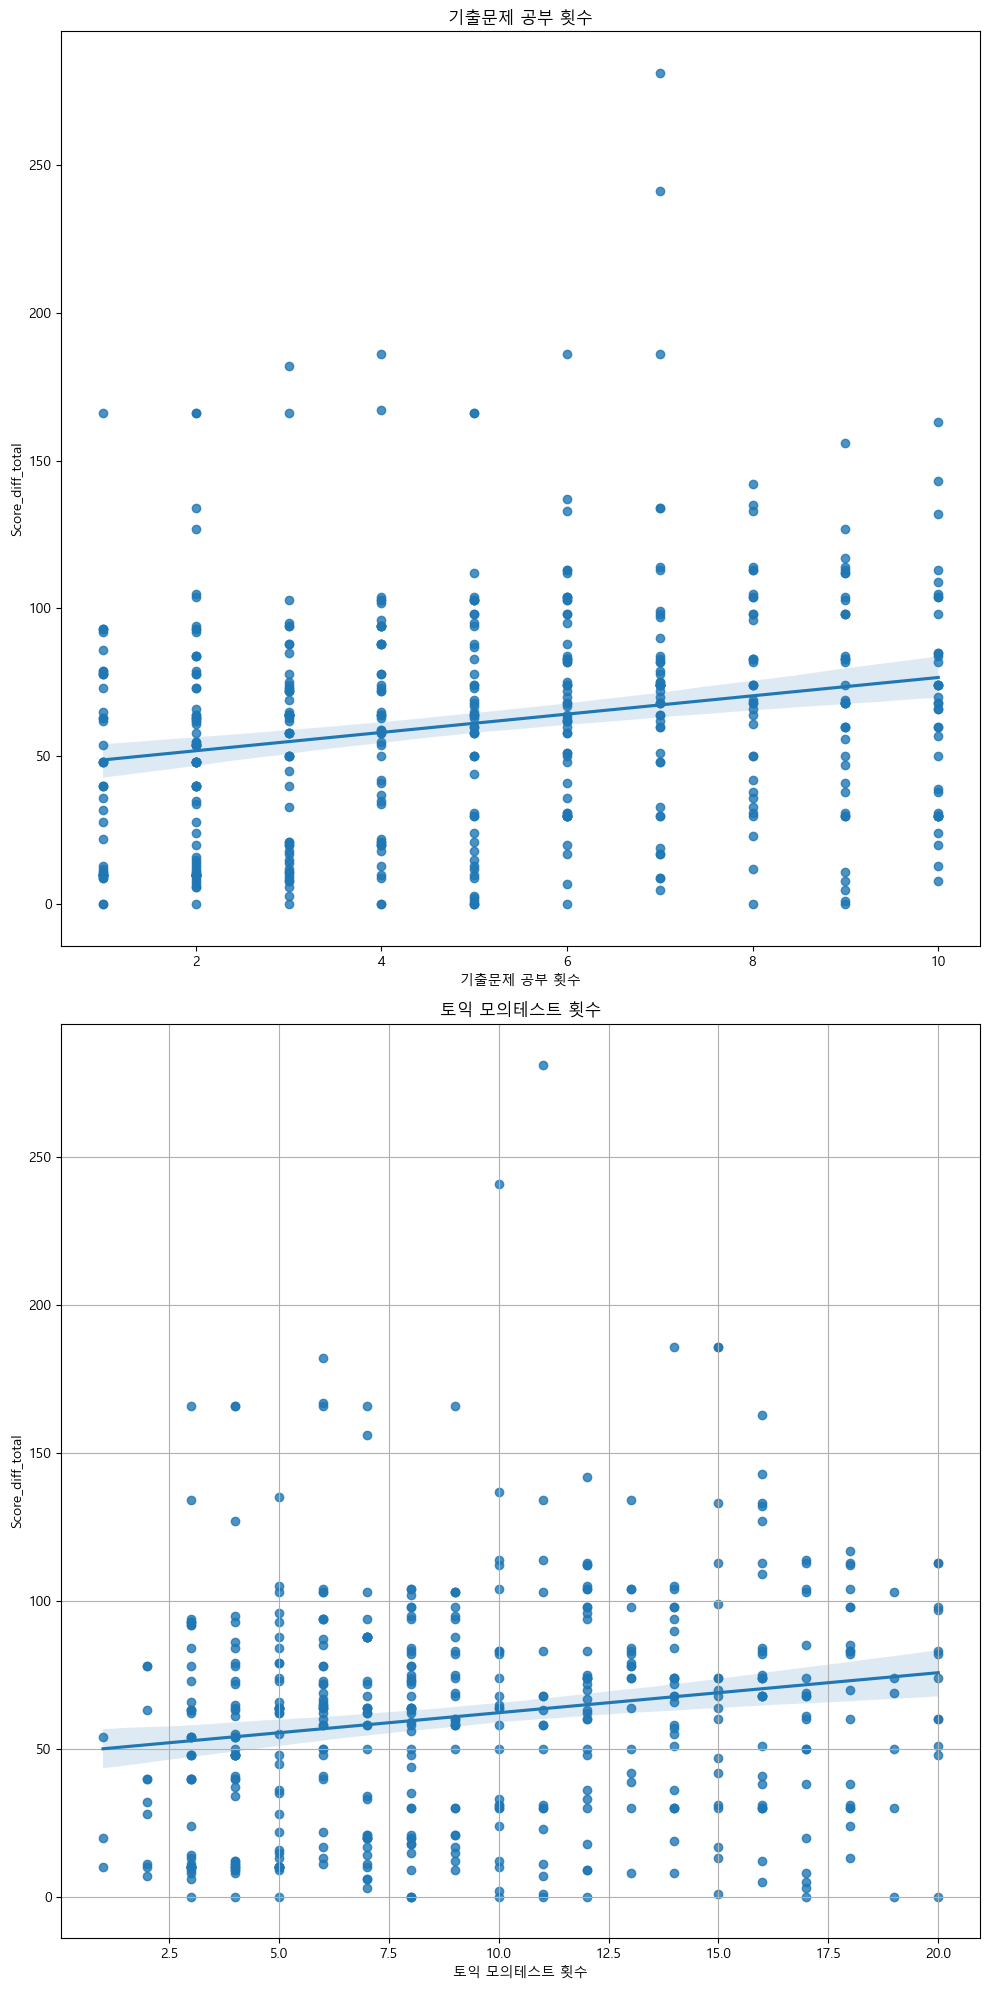

In [17]:
plt.figure(figsize=(10,20))

plt.subplot(2,1,1)
plt.title('기출문제 공부 횟수')
sns.regplot(x='기출문제 공부 횟수', y='Score_diff_total', data = base_data)

plt.subplot(2,1,2)
plt.title('토익 모의테스트 횟수')
sns.regplot(x='토익 모의테스트 횟수', y = 'Score_diff_total', data = base_data)

plt.grid()
plt.tight_layout()

# 숫자 vs 범주 통계량 분석
1. 3-2-1 Gender - M, F
2. 3-2-2 학습목표 - 자기계발, 승진, 취업
3. 3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의
4. 3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)
5. 3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)
6. 3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

file = 'toeic_preprocessed_data.csv'
## 코드 입력
base_data = pd.read_csv(file)
display(base_data.head(10))

# 필요 값 정의

# '3-2-1 Gender - M, F'
t_male= base_data.loc[base_data['Gender']=='M', 'Score_diff_total']
t_female= base_data.loc[base_data['Gender']== 'F', 'Score_diff_total']


# 3-2-2 학습목표 - 자기계발, 승진, 취업
t_target_anova_1 = base_data.loc[base_data.학습목표 == '자기계발', 'Score_diff_total']
t_target_anova_2 = base_data.loc[base_data.학습목표 == '승진', 'Score_diff_total']
t_target_anova_3 = base_data.loc[base_data.학습목표 == '취업', 'Score_diff_total']


#  3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의
t_how_anova_1 = base_data.loc[base_data.학습방법 == '온라인강의','Score_diff_total']
t_how_anova_2 = base_data.loc[base_data.학습방법 == '오프라인강의','Score_diff_total']
t_how_anova_3 = base_data.loc[base_data.학습방법 == '참고서', 'Score_diff_total']



# 3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)
t_type_anova_1 = base_data.loc[base_data['강의 학습 교재 유형'] == '일반적인 영어 텍스트 기반 교재', 'Score_diff_total']
t_type_anova_2 = base_data.loc[base_data['강의 학습 교재 유형'] == '영상 교재', 'Score_diff_total']
t_type_anova_3 = base_data.loc[base_data['강의 학습 교재 유형'] == '뉴스/이슈 기반 교재', 'Score_diff_total']
t_type_anova_4 = base_data.loc[base_data["강의 학습 교재 유형"] == '비즈니스 시뮬레이션(Role Play)', 'Score_diff_total']


# 3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)
t_freq_anova_1 = base_data.loc[base_data['학습빈도']=='주3-4회', 'Score_diff_total']
t_freq_anova_2 = base_data.loc[base_data['학습빈도']=='주5-6회', 'Score_diff_total']
t_freq_anova_3 = base_data.loc[base_data['학습빈도']=='주1-2회', 'Score_diff_total']
t_freq_anova_4 = base_data.loc[base_data['학습빈도']=='매일(주 7회)', 'Score_diff_total']


# 3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음
t_yes = base_data.loc[base_data['취약분야 인지 여부']=='알고 있음','Score_diff_total']
t_no =  base_data.loc[base_data['취약분야 인지 여부']=='알고 있지 않음', 'Score_diff_total']



,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7,알고 있음,10,181,173,354,227,213,440,241
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4,알고 있음,14,330,290,620,354,339,693,55
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4,알고 있음,4,367,309,676,396,365,761,37
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9,알고 있음,8,470,285,755,495,341,836,56
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6,알고 있음,4,273,372,645,314,426,740,95
5,6,F,1997,445,352,797,취업,온라인강의,영상 교재,주5-6회,9,알고 있음,7,360,256,616,372,269,641,156
6,7,F,1990,495,382,877,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주1-2회,4,알고 있음,4,487,337,824,495,341,836,41
7,8,M,1973,145,135,280,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,7,알고 있지 않음,7,132,129,261,133,130,263,17
8,9,M,1994,354,457,811,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,8,알고 있음,10,256,369,625,322,425,747,64
9,10,F,1984,423,346,769,승진,온라인강의,영상 교재,주5-6회,8,알고 있음,8,358,279,637,382,305,687,82


In [19]:
print('='*100, '\n이변량 분석', sep='')
print('귀무가설 : 집단 평균 간에 유의미한 차이가 없다.')
print('대립가설 : 집단 평균 간에 유의미한 차이가 있다.')
print('p-value가 0.05다 크면 귀무가설 채택')
print('='*100,'\n')

print('-'*100)
print('3-2-1 Gender - M, F')
display(spst.ttest_ind(t_male, t_female))

print('-'*100)
print('3-2-2 학습목표 - 자기계발, 승진, 취업')
display(spst.f_oneway(t_target_anova_1,t_target_anova_2,t_target_anova_3))

print('-'*100)
print('3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의')
display(spst.f_oneway(t_how_anova_1, t_how_anova_2, t_how_anova_3))

print('-'*100)
print('3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)')
display(spst.f_oneway(t_type_anova_1,t_type_anova_2, t_type_anova_3, t_type_anova_4))

print('-'*100)
print('3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)')
display(spst.f_oneway(t_freq_anova_1,t_freq_anova_2, t_freq_anova_3, t_freq_anova_4))

print('-'*100)
print('3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음')
display(spst.ttest_ind(t_yes, t_no))


이변량 분석
귀무가설 : 집단 평균 간에 유의미한 차이가 없다.
대립가설 : 집단 평균 간에 유의미한 차이가 있다.
p-value가 0.05다 크면 귀무가설 채택

----------------------------------------------------------------------------------------------------
3-2-1 Gender - M, F


Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

----------------------------------------------------------------------------------------------------
3-2-2 학습목표 - 자기계발, 승진, 취업


F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

----------------------------------------------------------------------------------------------------
3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의


F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

----------------------------------------------------------------------------------------------------
3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)


F_onewayResult(statistic=52.47853679755316, pvalue=1.7913087495809398e-29)

----------------------------------------------------------------------------------------------------
3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)


F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

----------------------------------------------------------------------------------------------------
3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음


Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

#### 통계 분석
- 현재 Gender를 제외하고 p-value < 0.05 이므로 귀무가설 기각 집단 평균 간에 유의미한 차이가 존재한다.

#### 시각화 분석

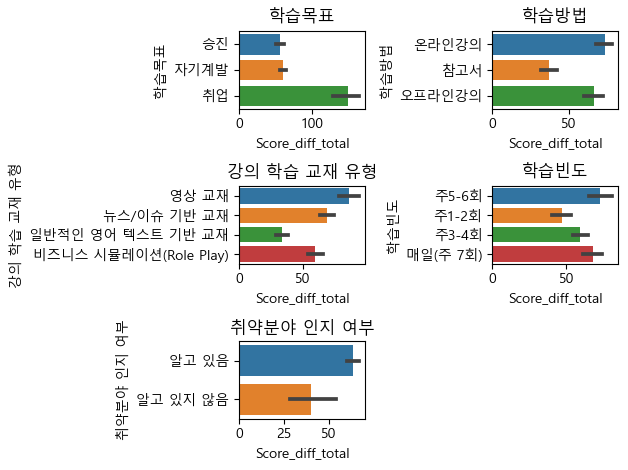

In [20]:
plt.subplot(3,2,1)
plt.title('학습목표')
sns.barplot(y='학습목표', x='Score_diff_total', data = base_data)

plt.subplot(3,2,2)
plt.title('학습방법')
sns.barplot(y='학습방법', x='Score_diff_total', data = base_data)

plt.subplot(3,2,3)
plt.title('강의 학습 교재 유형')
sns.barplot(y='강의 학습 교재 유형', x='Score_diff_total', data = base_data)

plt.subplot(3,2,4)
plt.title('학습빈도')
sns.barplot(y='학습빈도', x='Score_diff_total', data = base_data)

plt.subplot(3,2,5)
plt.title('취약분야 인지 여부')
sns.barplot(y='취약분야 인지 여부', x='Score_diff_total', data = base_data)

plt.tight_layout()

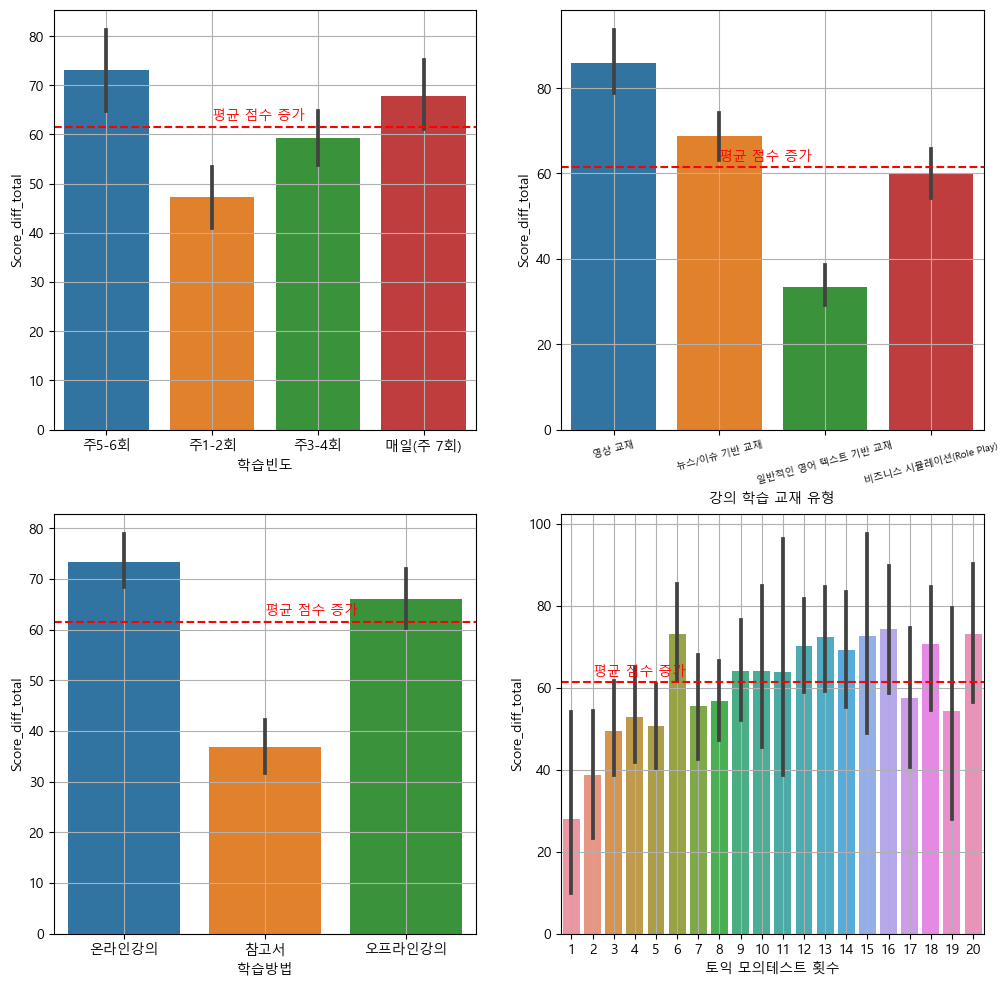

In [3]:
Score_diff_mean = base_data['Score_diff_total'].sum()/base_data['Score_diff_total'].count()

plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
sns.barplot(x = '학습빈도' ,y = 'Score_diff_total', data = base_data)
plt.axhline(y = Score_diff_mean, color = 'r', linestyle = '--')
plt.text(1,63,'평균 점수 증가',color = 'r')
plt.grid()

 

plt.subplot(2,2,2)
sns.barplot(x = '강의 학습 교재 유형' ,y = 'Score_diff_total', data = base_data)
plt.xticks(rotation =15, fontsize = 7)
plt.axhline(y = Score_diff_mean, color = 'r', linestyle = '--')
plt.text(1,63,'평균 점수 증가',color = 'r')
plt.grid()

 

plt.subplot(2,2,3)
sns.barplot(x = '학습방법',y = 'Score_diff_total', data = base_data)
plt.axhline(y = Score_diff_mean, color = 'r', linestyle = '--')
plt.text(1,63,'평균 점수 증가',color = 'r')
plt.grid()

 

plt.subplot(2,2,4)
sns.barplot(x = '토익 모의테스트 횟수' ,y = 'Score_diff_total', data = base_data)
plt.axhline(y = Score_diff_mean, color = 'r', linestyle = '--')
plt.text(1,63,'평균 점수 증가',color = 'r')
plt.grid()
plt.show()

F_onewayResult(statistic=2.0058017802848527, pvalue=0.05273090871333927)

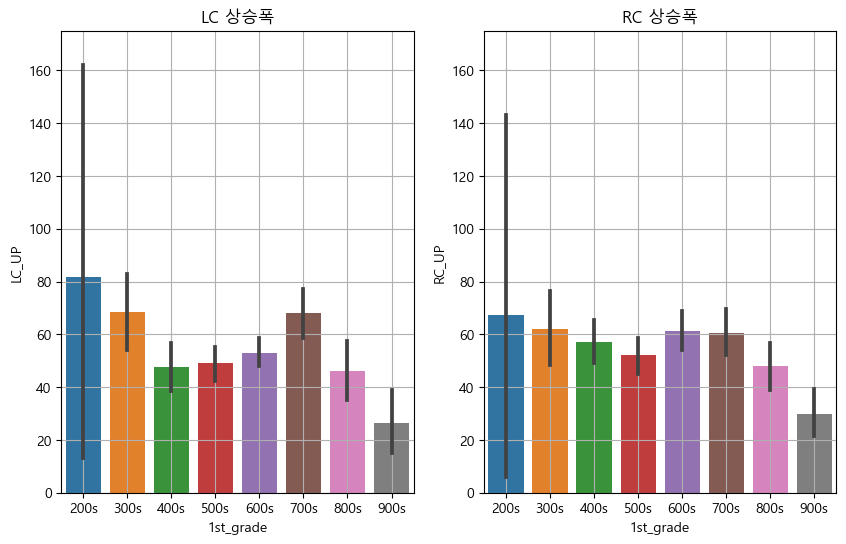

In [5]:
## 코드 입력
bins = [200,299,399,499,599,699,799,899,1000]

 

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = ['200s','300s','400s','500s','600s','700s','800s','900s']

 

## cut 함수 사용
## 코드 입력
base_data['1st_grade'] = pd.cut(base_data['1st_Total_Score'],bins = bins,labels = labels)

 

#RC,LC 점수 상승폭 컬럼 추가
base_data['RC_UP'] = base_data['3rd_RC_Score'] - base_data['1st_RC_Score']
base_data['LC_UP'] = base_data['3rd_LC_Score'] - base_data['1st_LC_Score']

 

#시각화
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.barplot(x = '1st_grade',y = 'LC_UP',data = base_data)
plt.ylim(0,175)
plt.title('LC 상승폭')
plt.grid()

 

plt.subplot(1,2,2)
sns.barplot(x = '1st_grade',y = 'RC_UP',data = base_data)
plt.ylim(0,175)
plt.title('RC 상승폭')
plt.grid()

 

#각각 분석
#LC
S2 = base_data.loc[base_data['1st_grade'] == '200s','LC_UP']
S3 = base_data.loc[base_data['1st_grade'] == '300s','LC_UP']
S4 = base_data.loc[base_data['1st_grade'] == '400s','LC_UP']
S5 = base_data.loc[base_data['1st_grade'] == '500s','LC_UP']
S6 = base_data.loc[base_data['1st_grade'] == '600s','LC_UP']
S7 = base_data.loc[base_data['1st_grade'] == '700s','LC_UP']
S8 = base_data.loc[base_data['1st_grade'] == '800s','LC_UP']
S9 = base_data.loc[base_data['1st_grade'] == '900s','LC_UP']
spst.f_oneway(S2,S3,S4,S5,S6,S7,S8,S9)

 

#RC
R2 = base_data.loc[base_data['1st_grade'] == '200s','RC_UP']
R3 = base_data.loc[base_data['1st_grade'] == '300s','RC_UP']
R4 = base_data.loc[base_data['1st_grade'] == '400s','RC_UP']
R5 = base_data.loc[base_data['1st_grade'] == '500s','RC_UP']
R6 = base_data.loc[base_data['1st_grade'] == '600s','RC_UP']
R7 = base_data.loc[base_data['1st_grade'] == '700s','RC_UP']
R8 = base_data.loc[base_data['1st_grade'] == '800s','RC_UP']
R9 = base_data.loc[base_data['1st_grade'] == '900s','RC_UP']
spst.f_oneway(R2,R3,R4,R5,R6,R7,R8,R9)

# 추가 데이터